In [1]:
'''
title: Hackathon
author: hazeez
date: May 03, 2020
objective: to read the provided `covid-19-cases.csv` file and to do data pre-processing and visualization to come up with
interesting insights
'''

# Hackathon

## Description of the dataset

The dataset contains confirmed and deaths information of covid-19 infected people across countries.

## Approach

> The approach
- Step1 : Data cleaning
- Step2 : Feature extraction
- Step3 : Visualization
- Step4 : Summary

### Step 1: Data Cleaning

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# set default options
pd.set_option("display.max.columns", None)
pd.set_option("display.precision",0)

In [4]:
# set color palette
flatui = ["#9b59b6", "#2ecc71", '#EA6A47','#1C4E80', '#0091D5','#B3C100', '#4CB5F5', '#1F3F49', '#D32D41', '#6AB187', '#23282D','#A5D8DD','#7E909A']

In [5]:
# read the dataset

covid = pd.read_csv('COVID-19-Cases.csv')

C:\Users\HAZEEZ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
covid.info()
# The memory used is 98 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718080 entries, 0 to 718079
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Case_Type                             718080 non-null  object 
 1   People_Total_Tested_Count             2352 non-null    float64
 2   Cases                                 718080 non-null  int64  
 3   Difference                            718080 non-null  int64  
 4   Date                                  718080 non-null  object 
 5   Combined_Key                          718080 non-null  object 
 6   Country_Region                        718080 non-null  object 
 7   Province_State                        680952 non-null  object 
 8   Admin2                                663816 non-null  object 
 9   iso2                                  717672 non-null  object 
 10  iso3                                  717876 non-null  object 
 11  

In [7]:
covid.columns

Index(['Case_Type', 'People_Total_Tested_Count', 'Cases', 'Difference', 'Date',
       'Combined_Key', 'Country_Region', 'Province_State', 'Admin2', 'iso2',
       'iso3', 'FIPS', 'Lat', 'Long', 'Population_Count',
       'People_Hospitalized_Cumulative_Count', 'Data_Source',
       'Prep_Flow_Runtime'],
      dtype='object')

In [8]:
#  drop unnecessary columns to reduce csv file memory
dropped_cols = ['People_Total_Tested_Count','Difference',
       'Combined_Key', 'Admin2', 'FIPS',
       'People_Hospitalized_Cumulative_Count', 'Data_Source',
       'Prep_Flow_Runtime']
covid.drop(columns = dropped_cols , inplace=True, axis=1)

In [9]:
covid.info()
# The memory has been reduced to 49 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718080 entries, 0 to 718079
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Case_Type         718080 non-null  object 
 1   Cases             718080 non-null  int64  
 2   Date              718080 non-null  object 
 3   Country_Region    718080 non-null  object 
 4   Province_State    680952 non-null  object 
 5   iso2              717672 non-null  object 
 6   iso3              717876 non-null  object 
 7   Lat               696660 non-null  float64
 8   Long              696660 non-null  float64
 9   Population_Count  696660 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 54.8+ MB


In [10]:
covid.shape
# Total number of rows is around 718080

(718080, 10)

In [11]:
# print the top columns
covid.head()

,Case_Type,Cases,Date,Country_Region,Province_State,iso2,iso3,Lat,Long,Population_Count
0,Confirmed,0,2/3/2020,Switzerland,NaN,CH,CHE,47,8,9e+06
1,Deaths,0,3/1/2020,Cyprus,NaN,CY,CYP,35,33,1e+06
2,Confirmed,23,4/21/2020,Antigua and Barbuda,NaN,AG,ATG,17,-62,1e+05
3,Deaths,0,2/11/2020,Jamaica,NaN,JM,JAM,18,-77,3e+06
4,Confirmed,0,2/6/2020,Belize,NaN,BZ,BLZ,17,-88,4e+05


In [12]:
# rename col values to lower for easy typing

covid.rename(
    columns = {
        'Case_Type': 'case_type',
        'Cases': 'cases',
        'Date': 'date',
        'Country_Region': 'country',
        'Province_State': 'province_state',
        'Lat': 'lat',
        'Long': 'long',
        'Population_Count': 'population'
    }, inplace=True
)

In [13]:
# columns after renaming
covid.columns

Index(['case_type', 'cases', 'date', 'country', 'province_state', 'iso2',
       'iso3', 'lat', 'long', 'population'],
      dtype='object')

In [14]:
# check column dtypes
covid.dtypes

case_type          object
cases               int64
date               object
country            object
province_state     object
iso2               object
iso3               object
lat               float64
long              float64
population        float64
dtype: object

In [15]:
# change date columns to datetime object
covid['date'] = pd.to_datetime(covid['date'])

In [16]:
# change populate column to integer object
# before converting we need to see if there are any NaN values
covid[covid['population'].isna()]['country'].value_counts()

US             21216
Cruise Ship      204
Name: country, dtype: int64

In [17]:
# drop cruise ship - not needed
covid.drop(covid[covid['country'] == 'Cruise Ship'].index, inplace=True) 

In [18]:
# check cruise_ships is gone
covid[covid['population'].isna()]['country'].value_counts()

US    21216
Name: country, dtype: int64

In [19]:
# fill population count for NaN rows of the population column
covid[covid['country'] == 'US']['population'].unique()

array([ 16073.,  95379.,     nan, ..., 318316., 152940.,   3259.])

In [20]:
# convert population column to integer
# covid['population'] = covid['population'].astype('int64')

In [21]:
covid.dtypes

case_type                 object
cases                      int64
date              datetime64[ns]
country                   object
province_state            object
iso2                      object
iso3                      object
lat                      float64
long                     float64
population               float64
dtype: object

In [22]:
# check unique countries
# a quick check identifies that there are no duplicated countries like US and United states of America
covid['country'].unique()

array(['Switzerland', 'Cyprus', 'Antigua and Barbuda', 'Jamaica',
       'Belize', 'Central African Republic', 'Netherlands',
       'United Kingdom', 'France', 'Poland', 'Canada', 'China',
       'Kazakhstan', 'South Sudan', 'Croatia', 'Chad', 'Hungary', 'Sudan',
       'Singapore', 'Bulgaria', 'Saint Lucia', 'Nepal', 'Peru',
       'United Arab Emirates', 'Sierra Leone', 'Brazil', 'Liechtenstein',
       'Pakistan', 'Equatorial Guinea', 'Thailand', 'Azerbaijan',
       'Bahrain', 'Kenya', 'Cabo Verde', 'Germany', 'Malta', 'Togo',
       'Montenegro', 'North Macedonia', 'Belarus', 'Tunisia',
       'Congo (Brazzaville)', 'Dominica', 'Austria', 'Paraguay',
       'Afghanistan', 'Angola', 'Yemen', 'Iraq', 'Brunei', 'Holy See',
       'Congo (Kinshasa)', 'Somalia', 'Botswana', 'New Zealand', 'Uganda',
       'Barbados', 'Djibouti', 'Norway', 'Kyrgyzstan', 'Sri Lanka',
       'Syria', 'Maldives', 'Georgia', 'Timor-Leste', 'El Salvador',
       'Mauritius', 'Oman', 'Rwanda', 'Bahamas', 'Mo

### Step2: Feature engineering

In [23]:
# add a couple of extra columns - month and week
covid['month'] = pd.DatetimeIndex(covid['date']).month
covid['week'] = pd.DatetimeIndex(covid['date']).week

In [24]:
# check month values
covid['month'].value_counts()

3    218178
4    211140
2    204102
1     70380
5     14076
Name: month, dtype: int64

In [25]:
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

covid['month_name'] = covid['month'].apply(lambda x: look_up[x])

In [26]:
covid.head()

,case_type,cases,date,country,province_state,iso2,iso3,lat,long,population,month,week,month_name
0,Confirmed,0,2020-02-03,Switzerland,NaN,CH,CHE,47,8,9e+06,2,6,Feb
1,Deaths,0,2020-03-01,Cyprus,NaN,CY,CYP,35,33,1e+06,3,9,Mar
2,Confirmed,23,2020-04-21,Antigua and Barbuda,NaN,AG,ATG,17,-62,1e+05,4,17,Apr
3,Deaths,0,2020-02-11,Jamaica,NaN,JM,JAM,18,-77,3e+06,2,7,Feb
4,Confirmed,0,2020-02-06,Belize,NaN,BZ,BLZ,17,-88,4e+05,2,6,Feb


In [27]:
# drop month column
covid.drop(columns = ['month','lat','long'], inplace=True, axis=1)
covid.head()

,case_type,cases,date,country,province_state,iso2,iso3,population,week,month_name
0,Confirmed,0,2020-02-03,Switzerland,NaN,CH,CHE,9e+06,6,Feb
1,Deaths,0,2020-03-01,Cyprus,NaN,CY,CYP,1e+06,9,Mar
2,Confirmed,23,2020-04-21,Antigua and Barbuda,NaN,AG,ATG,1e+05,17,Apr
3,Deaths,0,2020-02-11,Jamaica,NaN,JM,JAM,3e+06,7,Feb
4,Confirmed,0,2020-02-06,Belize,NaN,BZ,BLZ,4e+05,6,Feb


In [28]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717876 entries, 0 to 718079
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   case_type       717876 non-null  object        
 1   cases           717876 non-null  int64         
 2   date            717876 non-null  datetime64[ns]
 3   country         717876 non-null  object        
 4   province_state  680952 non-null  object        
 5   iso2            717672 non-null  object        
 6   iso3            717876 non-null  object        
 7   population      696660 non-null  float64       
 8   week            717876 non-null  int64         
 9   month_name      717876 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 60.2+ MB


In [29]:
# change the columns case_type, country, iso2, iso3, month_name to categorical type
# covid['case_type'] = pd.Categorical(covid['case_type'])
# covid['country'] = pd.Categorical(covid['country'])
# covid['iso2'] = pd.Categorical(covid['iso2'])
# covid['iso3'] = pd.Categorical(covid['iso3'])
# covid['province_state'] = pd.Categorical(covid['province_state'])
# covid['month_name'] = pd.Categorical(covid['month_name'])

In [30]:
covid.info()
# after doing categorical conversion - the memory has been reduced by 100%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717876 entries, 0 to 718079
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   case_type       717876 non-null  object        
 1   cases           717876 non-null  int64         
 2   date            717876 non-null  datetime64[ns]
 3   country         717876 non-null  object        
 4   province_state  680952 non-null  object        
 5   iso2            717672 non-null  object        
 6   iso3            717876 non-null  object        
 7   population      696660 non-null  float64       
 8   week            717876 non-null  int64         
 9   month_name      717876 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 60.2+ MB


### Step 3: Analysis and Visualization

The following visualizations will be attempted
- confirmed cases vy states in the US - top 10
- deaths by states in the US - top 10
- death ratio in the US - top states
- trend across weeks across top 10 states

In [31]:
# There is a problem here - US should have the most number of cases.

covid_us_trend = covid[covid.country == "US"].groupby('date').sum()['cases']
covid_us_trend = covid_us_trend.reset_index()
covid_us_trend['week'] = covid_us_trend['date'].dt.week
covid_us_trend_df = pd.DataFrame(covid_us_trend)
covid_us_trend_df = covid_us_trend_df.set_index('date')
covid_us_trend_df

,cases,week
date,,
2020-01-22,1,4
2020-01-23,1,4
2020-01-24,2,4
2020-01-25,2,4
2020-01-26,5,4
...,...,...
2020-04-28,1070782,18
2020-04-29,1100721,18
2020-04-30,1132265,18


---

#### Key Observation:

- From Week 12, US has seen an exponential growth in confirmed cases

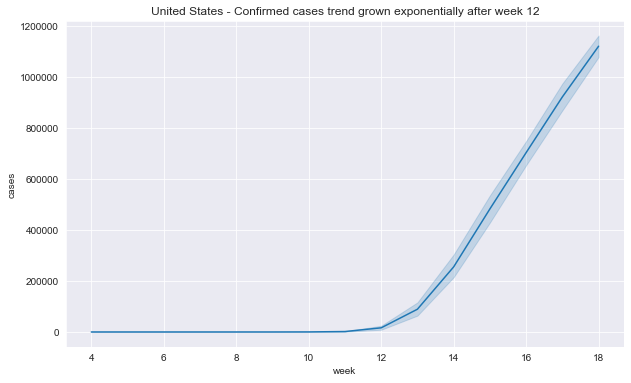

In [47]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
sns.lineplot(x='week', y='cases',data=covid_us_trend_df)
plt.title('United States - Confirmed cases trend grown exponentially after week 12')
plt.show()

--- 

#### Key observation:

- **New York** is the hotspot in US
- It has total cases of next four states combined

In [51]:
covid_df = covid[['country','case_type','cases', 'province_state']]
covid_state_trend = covid_df[(covid['country'] == 'US') & (covid['case_type'] == 'Confirmed')]
us_top_10 = covid_state_trend.groupby('province_state').max().sort_values('cases', ascending=False)['cases'].head(10)
us_top_10_df = pd.DataFrame(us_top_10)
us_top_10_df

,cases
province_state,
New York,172354
Illinois,40227
California,24894
Michigan,17106
New Jersey,15974
Pennsylvania,15137
Massachusetts,15048
Florida,12632
Connecticut,11801


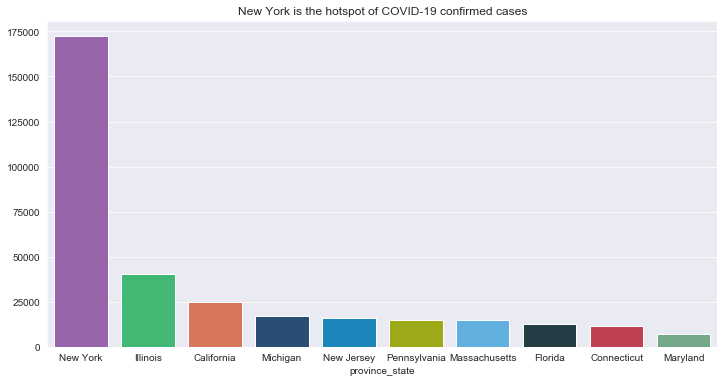

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(x=us_top_10.keys(), y= us_top_10.values,data=us_top_10_df, palette=flatui, )
plt.title('New York is the hotspot of COVID-19 confirmed cases')
plt.show()

---

#### Key observations:

- **New York** has **most number of deaths**
- **Deaths in New York alone equates to all other states**

In [35]:
# Most number of deaths

covid_state_deaths = covid_df[(covid['country'] == 'US') & (covid['case_type'] == 'Deaths')]
us_top_10_deaths = covid_state_deaths.groupby('province_state').max().sort_values('cases', ascending=False)['cases'].head(10)
us_df_deaths = pd.DataFrame(us_top_10_deaths)

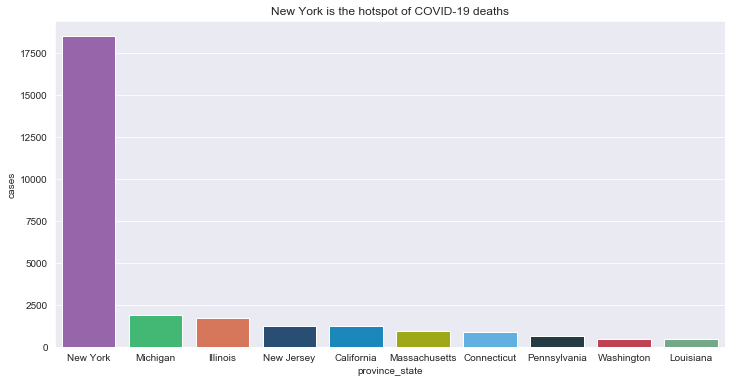

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x=us_top_10_deaths.keys(), y= 'cases',data=us_df_deaths, palette=flatui)
plt.title('New York is the hotspot of COVID-19 deaths')
plt.show()

---

#### Key Observation: 

- **Michigan** has the **highest death ratio followed by New York**
- May be due to the following reasons
    - poor health care infrastructure
    - more number of old aged people

In [37]:
# Confirmed vs death ratio

us_top_10_df_rd = us_top_10_df.rename(columns = {'cases':'confirmed'})
us_df_deaths_rd = us_df_deaths.rename(columns = {'cases':'deaths'})
us_conf_deaths_df = pd.concat([us_top_10_df_rd, us_df_deaths_rd], axis=1)
us_conf_deaths_df.dropna(inplace=True)
us_conf_deaths_df['death ratio'] = (us_conf_deaths_df['deaths'] / us_conf_deaths_df['confirmed']) * 100
us_conf_deaths_df = us_conf_deaths_df.sort_values('death ratio', ascending=False)
us_conf_deaths_df

,confirmed,deaths,death ratio
Michigan,17106,1884,11
New York,172354,18491,11
New Jersey,15974,1265,8
Connecticut,11801,865,7
Massachusetts,15048,923,6
California,24894,1209,5
Illinois,40227,1743,4
Pennsylvania,15137,638,4


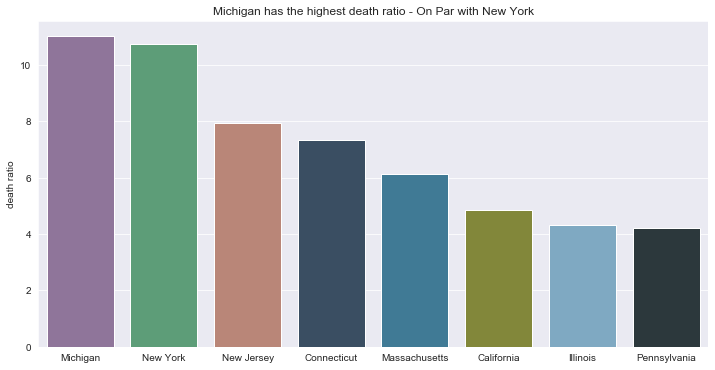

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x=us_conf_deaths_df.index, y= 'death ratio',data=us_conf_deaths_df, palette=flatui, saturation = 0.4)
plt.title('Michigan has the highest death ratio - On Par with New York')
plt.show()

---

#### Key observation:

- **New York is fast approaching the saturation point**
- Looks like the infection has reached the peak

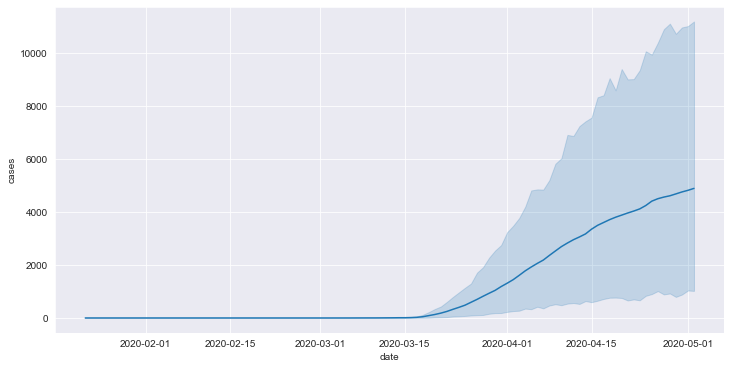

In [39]:
# Is New York Slowing down

covid_ny =  covid[(covid.province_state == 'New York') & (covid.case_type == 'Confirmed')]
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='cases',data=covid_ny)
plt.show()

---

#### Key observations:

- Out of the top 10 states, **8 states have 25000 or less cases**
- All the states show an **increasing trend**
- Looks like other states have taken **precautionary measures in week 12 and 13 - learning from New York surge in cases**


In [81]:
# get confirmed cases for top 10 states in the US
top_10_us = ['New York', 'Illinois', 'California', 'Michigan', 'New Jersey',
       'Pennsylvania', 'Massachusetts', 'Florida', 'Connecticut', 'Maryland']
covid_us = covid[(covid['country'] == 'US') & (covid['case_type'] == 'Confirmed') & (covid['province_state'].isin(top_10_us))]
covid_us_df = covid_us.groupby(['week','province_state']).max().reset_index()
covid_us_df = covid_us_df[['week','province_state','cases','population','month_name']]
covid_us_df = covid_us_df[covid_us_df.week > 10]

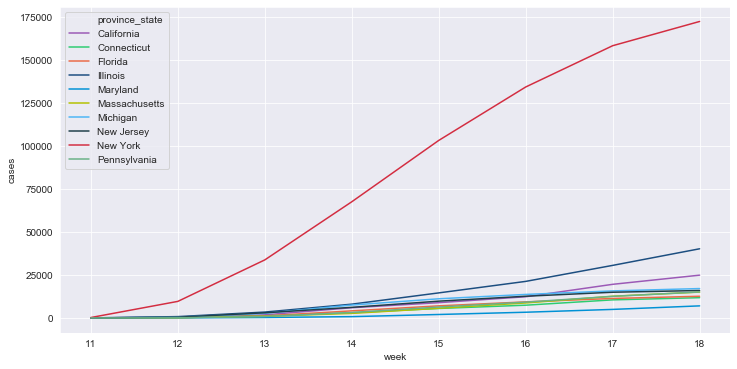

In [80]:
# cases in top 10 states over months
plt.figure(figsize=(12,6))
sns.lineplot(x='week', y='cases', data=covid_us_df, hue='province_state', palette=sns.set_palette(flatui, n_colors =10))
plt.show()

### Step4: Conclusion

The COVID 19 dataset was clean and the data clean-up actions were limited. However, the dataset is challenging in terms of the way the data is reported. For certain countries, the state-wise break-up is given and for most countries, the numbers are consolidated at the country level.

All the required steps were followed for pre-processing and the dataset provided some interesting insights when an analysis for US states were done.

> Key Observations:
- US is the worst-affected country
- New York is the worst-affected state
- Death rates are highest in Michigan - ahead than New York which is surprising
- It seems other states took necessasry precautions learing from New York during the early stages (week 12 and 13) of the pandemic
- New York is fast approaching the peak and a saturation is expected soon.